In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import matplot2tikz

In [2]:
# Path to your event files
experiment_path = "../../runs/sac/winrate_runs/*/events.*"
event_files = glob.glob(experiment_path, recursive=True)

all_data = []

for file in event_files:
    print(file)
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.HasField('simple_value'):  # Scalars only
                all_data.append({
                    'file': os.path.basename(file),
                    "path": file,
                    'tag': v.tag,
                    'step': e.step,
                    'value': v.simple_value
                })

df = pd.DataFrame(all_data)
print(df.head())

../../runs/sac/winrate_runs\sac\events.out.tfevents.1771972390.tcml-node39.1023698.0

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
                                                file  \
0  events.out.tfevents.1771972390.tcml-node39.102...   
1  events.out.tfevents.1771972390.tcml-node39.102...   
2  events.out.tfevents.1771972390.tcml-node39.102...   
3  events.out.tfevents.1771972390.tcml-node39.102...   
4  events.out.tfevents.1771972390.tcml-node39.102...   

                                                path                     tag  \
0  ../../runs/sac/winrate_runs\sac\events.out.tfe...  charts/episodic_return   
1  ../../runs/sac/winrate_runs\sac\events.out.tfe...  charts/episodic_length   
2  ../../runs/sac/winrate_runs\sac\events.out.tfe...      charts/time_return   
3  ../../runs/sac/winrate_runs\sac\events.out.tfe...     charts/winrate/hard   
4  ../../runs/sac/winrate_runs\sac\events.out.tfe...      charts/winrate_raw   

   step    

In [5]:
df = pd.DataFrame(all_data)
tag = "charts/winrate_raw"
df_filtered = df[df['tag'] == tag]
df_filtered = df_filtered[["path", "step", "value"]]
df_filtered["path"] = df_filtered["path"].str.slice(28, 31)

In [6]:
print(df_filtered.head())

   path  step  value
4   sac    27   -1.0
9   sac    28   -1.0
14  sac    29   -1.0
19  sac    31   -1.0
24  sac    33   -1.0


In [16]:
df_filtered["win"] = df_filtered["value"] == 1
df_filtered["loss"] = df_filtered["value"] == -1
df_filtered["draw"] = df_filtered["value"] == 0

df_filtered["winrate"] = df_filtered["win"].rolling(window=50).mean()
df_filtered["lossrate"] = df_filtered["loss"].rolling(window=50).mean()
df_filtered["drawrate"] = df_filtered["draw"].rolling(window=50).mean()

df_no_draw = df_filtered[df_filtered["draw"]==False].copy()

df_no_draw["winrate_no_draw"] = df_no_draw["win"].rolling(window=50).mean()


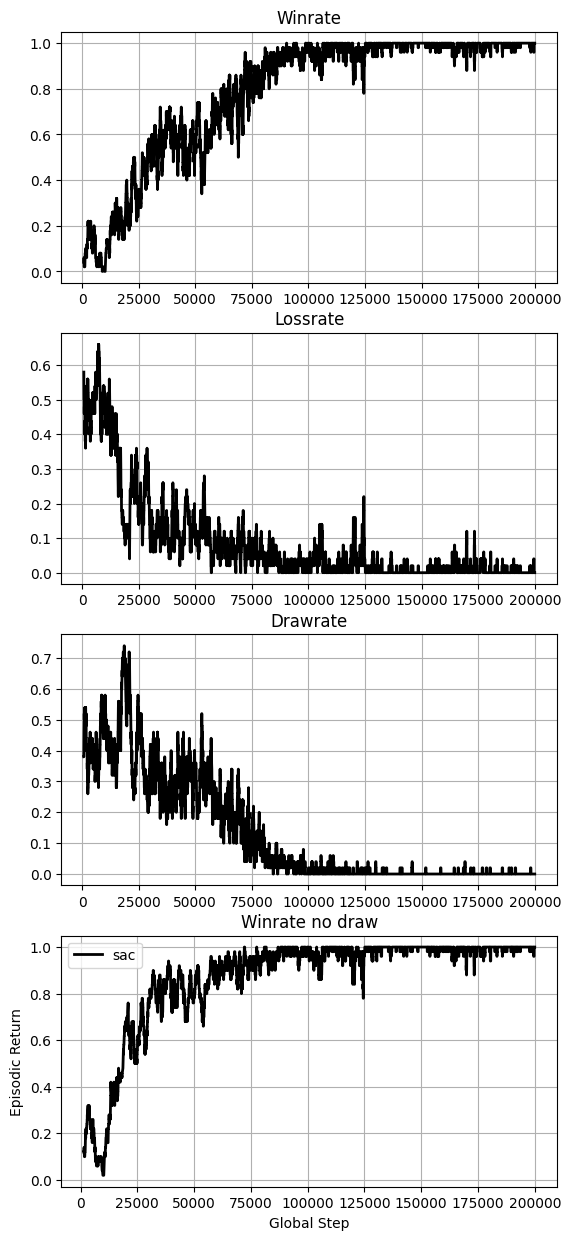

In [17]:
fig, ax = plt.subplots(nrows=4)
colors = ["black", "gray", "rosybrown", "lightcoral", "firebrick", "red", "peru", "darkorange", "goldenrod", "palegoldenrod", "yellow", "olive", "greenyellow", "darkseagreen", "turquoise", "teal", "indigo"]
for index, g in enumerate(df_filtered.groupby("path")):
    ax[0].plot(g[1]["step"], g[1]["winrate"], label=g[0], color=colors[index], linewidth=2)
    ax[0].set_title("Winrate")
    ax[1].plot(g[1]["step"], g[1]["lossrate"], label=g[0], color=colors[index], linewidth=2)
    ax[1].set_title("Lossrate")
    ax[2].plot(g[1]["step"], g[1]["drawrate"], label=g[0], color=colors[index], linewidth=2)
    ax[2].set_title("Drawrate")
for index, g in enumerate(df_no_draw.groupby("path")):
    ax[3].set_title("Winrate no draw")
    ax[3].plot(g[1]["step"], g[1]["winrate_no_draw"], label=g[0], color=colors[index], linewidth=2)
for ax_i in ax:
    ax_i.grid(True)

fig.set_figheight(15)
plt.xlabel("Global Step")
plt.ylabel("Episodic Return")
plt.legend()
plt.show()